In [30]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.learning_curve import learning_curve
from sklearn import tree, metrics
from matplotlib import pyplot as plt
from sklearn.cross_validation import train_test_split, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score,confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import  cross_val_score
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from time import time
from operator import itemgetter
from sklearn.model_selection import validation_curve
import datetime

import sklearn.preprocessing as preprocessing
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

import graphviz 
import timeit
import os
from IPython.display import Image

In [2]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'educationalnum','marital-status', 'occupation', 'relationship', 'race', 'gender','capitalgain', 'capitalloss', 'hoursperweek', 'nativecountry','income']

train = pd.read_csv('adult.csv', header=None, names = columns)
test = pd.read_csv('adult_test.csv',  header=None, names = columns)

adult = pd.concat([train,test])

len(adult)

48842

In [3]:
adult.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educationalnum',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capitalgain', 'capitalloss', 'hoursperweek', 'nativecountry',
       'income'],
      dtype='object')

In [4]:
adult['nativecountry'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [5]:
print("Before dropping size = " , len(adult))

adult = adult[adult.occupation.str.strip() != '?']
adult = adult[adult.workclass.str.strip() != '?']
adult = adult[adult.nativecountry.str.strip() != '?']

print("After removing rows with value ?" , len(adult))


Before dropping size =  48842
After removing rows with value ? 45222


In [6]:
def func(x):
    if(x == " <=50K" or x == " <=50K."):
        return 0
    elif(x == " >50K" or x == ' >50K.'):
        return 1
adult['income'] = adult['income'].apply(func)

y = adult['income']
del adult['income']

In [7]:
adult.head()

,age,workclass,fnlwgt,education,educationalnum,marital-status,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


#### Education and educationnum both represent the level of education. So we can remove one of them.
#### fnlwgt – The number of people the census takers believe that observation represents. Remove this variable.

In [8]:
del adult['education']
del adult['fnlwgt']

In [9]:
adult.head()

,age,workclass,educationalnum,marital-status,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [10]:
adult = pd.get_dummies(adult, columns=['workclass','marital-status','occupation',
                                         'relationship','race',
                                         'gender','nativecountry'])

In [11]:
adult.head()

,age,educationalnum,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,nativecountry_ Portugal,nativecountry_ Puerto-Rico,nativecountry_ Scotland,nativecountry_ South,nativecountry_ Taiwan,nativecountry_ Thailand,nativecountry_ Trinadad&Tobago,nativecountry_ United-States,nativecountry_ Vietnam,nativecountry_ Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
#adult = preprocessing.normalize(adult, norm = 'l2')
#adult = preprocessing.scale(adult)

In [13]:
adult.shape

(45222, 87)

In [14]:

# Train - Test split# Train  
X_train, X_test, y_train, y_test = train_test_split(adult, y, test_size  = 0.3, random_state = 55)

print("Training dataset size: ", len(X_train))
print("Testing dataset size: ", len(X_test))
print("Training label dataset size: ", len(y_train))
print("Testing label dataset size: ", len(y_test))

Training dataset size:  31655
Testing dataset size:  13567
Training label dataset size:  31655
Testing label dataset size:  13567


### Check for hyper paramters using neighbors

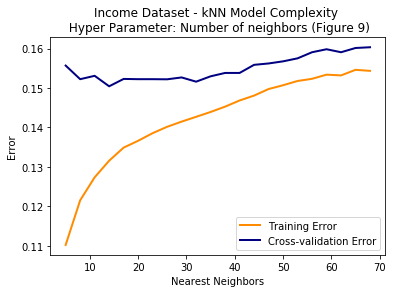

train_scores = [ 0.88973308  0.87843943  0.87261887  0.86840941  0.8650924   0.86336282
  0.8614358   0.85982467  0.85851366  0.85729742  0.85606538  0.85472279
  0.85315906  0.85191914  0.85026064  0.84929712  0.84822302  0.8476702
  0.84661982  0.84680935  0.84539567  0.84565629]
test_scores = [ 0.84432159  0.84776495  0.84691216  0.8495659   0.84770194  0.84776513
  0.84776514  0.84779684  0.8473229   0.84839679  0.84703857  0.84618561
  0.84618565  0.8441323   0.84378483  0.84324775  0.84248953  0.84094167
  0.84018346  0.84094166  0.83986754  0.83967798]
Optimal nearest neighbors =  14  Minimum Error =   0.150434102593


In [34]:

np.random.seed(55)
neigh = KNeighborsClassifier()


param_range = np.arange(5,70,3)
train_scores, test_scores = validation_curve( neigh, X_train, y_train, param_name="n_neighbors", param_range=param_range,
    cv=5, scoring=make_scorer(accuracy_score), n_jobs=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.title("Income Dataset - kNN Model Complexity \n Hyper Parameter: Number of neighbors (Figure 9)")
plt.xlabel("Nearest Neighbors")
plt.ylabel("Error")


lw = 2
plt.plot(param_range, 1 - train_mean, label="Training Error",
             color="darkorange", lw=lw)
plt.plot(param_range, 1 - test_mean, label="Cross-validation Error",
             color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

print("train_scores =", train_mean)
print("test_scores =", test_mean)
print("Optimal nearest neighbors = ",  param_range[np.ndarray.argmax(test_mean)], " Minimum Error =  " , (1 - np.amax(test_mean))  )


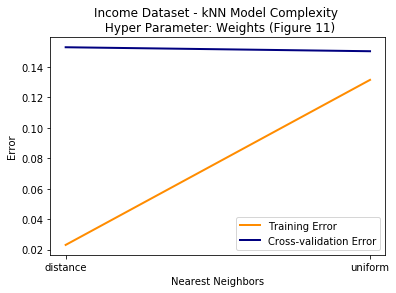

train_scores = [ 0.86840941  0.97697837]
test_scores = [ 0.8495659   0.84694385]
Optimal nearest neighbors =  uniform  Minimum Error =   0.150434102593


In [21]:

np.random.seed(55)
neigh = KNeighborsClassifier(n_neighbors=14)


param_range = ["uniform", "distance"]
train_scores, test_scores = validation_curve( neigh, X_train, y_train, param_name="weights", param_range=param_range,
    cv=5, scoring=make_scorer(accuracy_score), n_jobs=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.title("Income Dataset - kNN Model Complexity \n Hyper Parameter: Weights (Figure 11)")
plt.xlabel("Nearest Neighbors")
plt.ylabel("Error")


lw = 2
plt.plot(param_range, 1 - train_mean, label="Training Error",
             color="darkorange", lw=lw)
plt.plot(param_range, 1 - test_mean, label="Cross-validation Error",
             color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

print("train_scores =", train_mean)
print("test_scores =", test_mean)
print("Optimal nearest neighbors = ",  param_range[np.ndarray.argmax(test_mean)], " Minimum Error =  " , (1 - np.amax(test_mean))  )


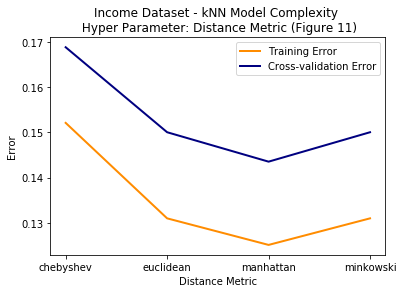

train_scores = [ 0.86902192  0.87489777  0.86902192  0.84790888]
test_scores = [ 0.84997658  0.85648401  0.84997658  0.83118035]
Optimal nearest neighbors =  manhattan  Minimum Error =   0.143515993784


In [29]:

np.random.seed(55)
neigh = KNeighborsClassifier(n_neighbors=14)


#param_range = ["minkowski", "euclidean", "manhattan","wminkowski"]
param_range = ["minkowski", "manhattan","euclidean","chebyshev"]
train_scores, test_scores = validation_curve( neigh, X_train, y_train, param_name="metric", param_range=param_range,
    cv=10, scoring=make_scorer(accuracy_score), n_jobs=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.title("Income Dataset - kNN Model Complexity \n Hyper Parameter: Distance Metric (Figure 11)")
plt.xlabel("Distance Metric")
plt.ylabel("Error")


lw = 2
plt.plot(param_range, 1 - train_mean, label="Training Error",
             color="darkorange", lw=lw)
plt.plot(param_range, 1 - test_mean, label="Cross-validation Error",
             color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

print("train_scores =", train_mean)
print("test_scores =", test_mean)
print("Optimal nearest neighbors = ",  param_range[np.ndarray.argmax(test_mean)], " Minimum Error =  " , (1 - np.amax(test_mean))  )


### Create learning curve - Sample data set size vs. Error


train_scores = [ 0.85703002  0.86319115  0.86798315  0.86673907  0.86922044  0.87000592
  0.8724134   0.8726824   0.87415533  0.87510958]
test_scores = [ 0.83484471  0.84435352  0.84959743  0.84868093  0.8511452   0.85133493
  0.85326199  0.85468351  0.85408317  0.85537847]
train sizes = [ 2532  5064  7596 10129 12661 15193 17726 20258 22790 25323]


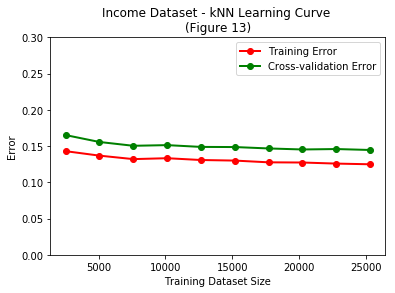

In [32]:
np.random.seed(55)
#Create timings for Traoning Set
neigh = KNeighborsClassifier(n_neighbors=14, metric = "manhattan")
st_train_time = timeit.default_timer()
neigh.fit(X_train, y_train)
end_train_time = timeit.default_timer()

title = "Income Dataset - kNN Learning Curve \n(Figure 13)"
ylim=(0.0, 0.3)
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
#cv = ShuffleSplit(n_splits=100, test_size=0.3, random_state=0)
#cv = StratifiedKFold(y_train, n_folds=10)
#plot_learning_curve(estimator, title, X_train, y_train, , cv=cv, n_jobs=4)



plt.title(title)
if ylim is not None:
    plt.ylim(*ylim)
plt.xlabel("Training Dataset Size")
plt.ylabel("Error")
train_sizes, train_scores, test_scores = learning_curve(
    neigh, X_train, y_train, cv=5, n_jobs=4, train_sizes=np.linspace(.1, 1.0, 10))



train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
#test_scores_mean1 = np.mean(test_scores1, axis=1)

print("")
    
lw = 2
plt.plot(train_sizes, 1 - train_scores_mean, 'o-', color="r",
             label="Training Error",  lw=lw)
plt.plot(train_sizes, (1- test_scores_mean), 'o-', color="g",
             label="Cross-validation Error",  lw=lw)

plt.legend(loc="best")
print("train_scores =", train_scores_mean)
print("test_scores =", test_scores_mean)
print("train sizes =", train_sizes)

plt.show()




### Predict on Testing set

In [33]:
st_pred_time = timeit.default_timer() 
y_pred = neigh.predict(X_test)
end_pred_time = timeit.default_timer() 

pred_time = end_pred_time - st_pred_time

print("Accuracy: %s%%" % (100*accuracy_score(y_test, y_pred)))
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred, target_names=['y', 'n']))
print("AUC =", roc_auc_score(y_test, y_pred))
print("Prediction Time = ", pred_time)
print("Training Time = ", end_train_time - st_train_time)
#Create timings for Cross-validation set


Accuracy: 85.6932262107%
[[9530  625]
 [1316 2096]]
             precision    recall  f1-score   support

          y       0.88      0.94      0.91     10155
          n       0.77      0.61      0.68      3412

avg / total       0.85      0.86      0.85     13567

AUC = 0.776378212732
Prediction Time =  12.328118566016201
Training Time =  2.2655593079980463
